In [1]:
'''
___OVERVIEW___
CODE FOR QUESTION 4 - HW 6
`
___SUMMARY___
Feature Based Registeration

___AUTHOR___
Amirhossein Daraie — 9733023

___DATE___
26/June/2021
06/04/1400

'''

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img1 = cv2.imread('MRI.jpg', flags=cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('MRI2.jpg', flags=cv2.IMREAD_GRAYSCALE)
cimg1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
cimg2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)

In [3]:
features1 = np.zeros((10,2))         
features2 = np.zeros((10,2))  

clickCounter = 0
selectionFinish = False

def fill_feature():

    global clickCounter
    global selectionFinish
    
    clickCounter += 1
    
    if clickCounter < 21:
        
        if clickCounter%2 != 0:
            if mouseX < 256:
                cv2.circle(cimg,(mouseX,mouseY),1,(255,255,0),-1)
                features1[(clickCounter-1)//2,0] = mouseX
                features1[(clickCounter-1)//2,1] = mouseY
            else:
                print('ಠ_ಠ select from left image — NOT RIGHT !!')
                clickCounter -= 1
        else:
            if mouseX > 256:
                cv2.circle(cimg,(mouseX,mouseY),1,(255,255,0),-1)
                features2[clickCounter//2-1,0] = mouseX-257
                features2[clickCounter//2-1,1] = mouseY
                x1, y1 = features1[clickCounter//2-1]
                x2, y2 = features2[clickCounter//2-1]
                x2 += 257
                cv2.line(cimg, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), thickness=1)
            else:
                print('ಠ_ಠ select from right image — NOT LEFT !!')
                clickCounter -= 1
                
    else:
        
        selectionFinish = True

def draw_circle(event,x,y,flags,param):
    
    global mouseX,mouseY
    if event == cv2.EVENT_LBUTTONDOWN:
        mouseX,mouseY = x,y
        fill_feature()
        

img = np.concatenate((img1,img2),axis=1)
cimg = np.concatenate((cimg1,cimg2),axis=1)

cv2.namedWindow('image', cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)
cv2.setMouseCallback('image',draw_circle)
    
while(1):
    cv2.imshow('image',cimg)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('q'):
        break
    if selectionFinish == True:
        print('Selection finish')
        for i in range(10):
            print(f'feature {i+1}: [{features1[i,0]},{features1[i,1]}] and [{features2[i,0]},{features2[i,1]}]')
        break
    
cv2.destroyAllWindows()

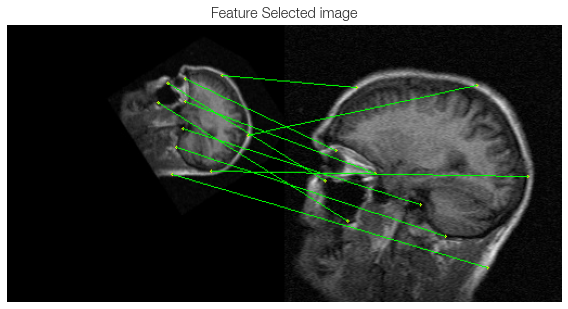

In [98]:
fig, ax = plt.subplots(figsize=(8,8))
st = fig.suptitle("Feature Selected image", fontsize="x-large", y=.75)
ax.imshow(cimg,cmap='gray')
ax.axis('off')
plt.tight_layout()
plt.show()

Conversion matrix values :  
 [[ 2.63195272e+00  3.76099201e+00 -5.22930777e+02]
 [-2.41489176e+00  2.37199496e+00  5.19551954e+02]
 [ 6.30450041e-03  1.25577125e-03  1.00000000e+00]]


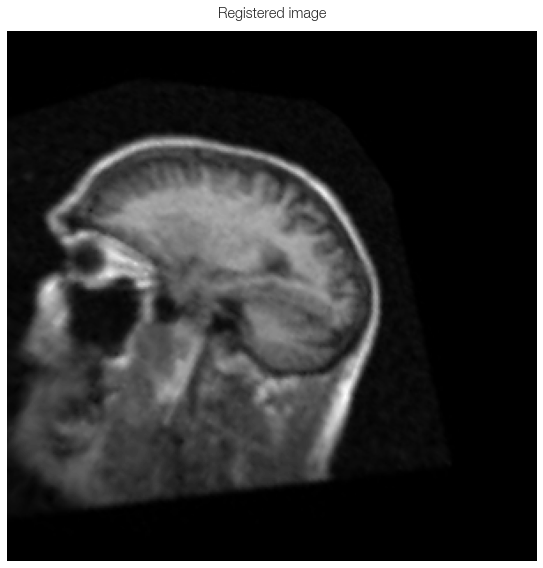

In [101]:
homo, mask = cv2.findHomography(features1, features2, cv2.RANSAC)
print('Conversion matrix values : ','\n',homo)
transformed_img = cv2.warpPerspective(img1, homo, (300, 300)) 

fig, ax = plt.subplots(figsize=(8,8))
st = fig.suptitle("Registered image", fontsize="x-large", y=0.98)
ax.imshow(transformed_img,cmap='gray')
ax.axis('off')
plt.tight_layout()
plt.show()